# This notebook will take your regression or classification problem, the y variables (dependent) and x variables (independent) and determine which have what level of contribution to your dataset.
## This will allow you to visualize the information context of Xn to Y, and decide what to keep in future analyses, such as development of lienar regression

In [1]:
#Imports
import os
import glob as glob
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

import numpy as np
np.set_printoptions(precision=3, suppress=True)
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
#Calculate Correlation
from scipy.stats import pearsonr
import os
import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import platform

In [2]:
analysis = 'ols_linear_regression/regression'
if platform.uname().system == 'Darwin': #------------------------------Mac OS X---------------------------------------------------------------
    conn_path = r'/Users/cu135/Dropbox (Partners HealthCare)/memory/final_analyses/interaction_analysis/spcorrel_interaction_effect/ferguson_memory_derivatives_with_clinical_data.csv'
    clin_path = r'/Users/cu135/Dropbox (Partners HealthCare)/memory/functional_networks/vta_published_t_connectivity'
    # clin_path = 'path to clinical values'
    out_dir = os.path.join(conn_path.split('.')[0], f'{analysis}')
    #out_dir = r'path to out dir here'
    x_roi_names = r'/Users/cu135/Dropbox (Partners HealthCare)/memory/analyses/roi-roi_correl/addbs_vta_to_memory_net_maxima/matrix_corrMx_names.csv'
    #roi_names = '<path to roi name location>'
    
    print('I have set pathnames in the Mac style')
    print('I will save to :', out_dir)
else: #----------------------------------------------------------------Windows----------------------------------------------------------------
    conn_path = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\roi-roi_correl\matrix_corrMx_AvgR.csv'
    clin_path = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\patient_data\AD_Clinical_Data_CDR_ADAS_COG_13.xlsx'
    # clin_path = 'path to clinical values'
    out_dir = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\AD_to_memory_net'
    #out_dir = r'path to out dir here'
    x_roi_names = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\roi-roi_correl\matrix_corrMx_names.csv'
    #roi_names = '<path to roi name location>'
    print('I have set pathnames in the Windows style')

I have set pathnames in the Mac style
I will save to : /Users/cu135/Dropbox (Partners HealthCare)/memory/final_analyses/interaction_analysis/spcorrel_interaction_effect/ferguson_memory_derivatives_with_clinical_data/ols_linear_regression/regression


## Import Pre-prepared Regression Data

## Prepare for regression

In [3]:
variables_to_change = {}
variables_to_change['original'] = [
    '% Change from baseline (ADAS-Cog11)'
  
    ]
variables_to_change['destination'] = [
    'percent_change_adascog11'
    
    ]
#----------------------------------------------------------------user input above----------------------------------------------------------------
data_df = pd.read_csv(conn_path)
try:
    change_string = ''
    for i in range (0, len(variables_to_change['original'])):
        change_string += f"variables_to_change['original'][{i}]: variables_to_change['destination'][{i}],"
    change_string = 'data_df.rename(columns={' + change_string[0:-1] + '})'
    data_df = eval(change_string)
except:
    print('no change necessary')

data_df = data_df.reset_index(drop=True)

#Select specific subgroup
# outlier_index = (data_df['percent_change_adascog11'] <= -50)
# data_df = data_df.loc[outlier_index, :]

# Remove outlier
outlier_index=[11, 47, 48, 49]
data_df = data_df.drop(index=outlier_index)
data_df.reset_index(drop=True, inplace=True)

try:    
    data_df.pop('Unnamed: 0')
    data_df.pop('Patient # CDR, ADAS')
    # data_df.pop('Age at DOS')
    data_df.pop('Randomization Arm')
    data_df.pop('Baseline ADAS-Cog11')
    data_df.pop('Baseline CDR (sum of squares)')
    data_df.pop('% Change from baseline (CDR)')
    data_df.dropna(inplace=True)
    data_df.reset_index(drop=True, inplace=True)
except:
    print('none to pop')
    
#Standardize the data
preserved_df = data_df.copy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
# data_df = data_df.apply(scaler.fit_transform(), axis=0)
data_df[data_df.columns] = scaler.fit_transform(data_df[data_df.columns])


# #move outcomes to start
try:
    first_column = data_df.pop('percent_change_adascog11')  # Remove column and store it in a variable
    data_df.insert(0, 'percent_change_adascog11', first_column)  # Insert column at the first position
except:
    print('Could not move outcomes to start')

display(data_df)

,percent_change_adascog11,Age,memet_spcorrel
0,0.317537,-0.618120,-1.934260
1,0.014153,1.277448,-1.961339
2,-0.850871,1.151077,-0.852119
3,-1.875980,-0.239006,-1.419448
4,0.539000,-2.134575,-1.320614
5,-0.028462,-0.112635,-0.567214
6,0.440311,-0.365378,-1.242120
7,0.160349,-0.870863,-0.778966
8,0.134589,0.645592,0.360130
9,-0.966009,0.645592,1.258135


In [4]:
#Check multicollinearity
mc_test = data_df.copy()
mc_test.pop('percent_change_adascog11')

from calvin_utils.statistical_measurements import calculate_vif
calculate_vif(mc_test)

,features,VIF
0,Age,1.010229
1,memet_spcorrel,1.010229


## Generate Statsmodel Linear Model

In [5]:
#function attempt
from calvin_utils.custom_regressions import basic_trivariate_regression, generalizable_multivariate_regression
# results = basic_trivariate_regression(x=col2, y=col3, z=ycolumn_of_interest, conjoined_df=merged_dataframe)
# data_df.pop('RMap')

#Select all regressors
all_indeps = data_df.columns.tolist()[-1:]
#Select specific regressors
# all_indeps = np.array(all_indeps)[[-1]]
# all_indeps = ['pca_component_0']#, 'Ventral_Attention', 'Visual', 'Dorsal_Attention', 'Limbic', 'Default']#, 'SBC'] #,Thal_Ant_Med_L 'PFC_Mid_Vent'] #,'', #'Front_Sup_L'] #, 'SBC'] #, 'Cereb_IX_R', 'Occ_med_L', 'Par_Lat_L', 'SBC_L', 'Sbc_Retrospl_L', 'Temp_Lat_R']

#Select outcome variable 
dep_var = 'percent_change_adascog11'

# if isinstance(all_indeps[0], tuple):
#     print('Found tuple, correcting')
#     new_indeps = []
#     for indep in all_indeps:
#         new_indeps.append(indep[0])
#     data_df = data_df.set_axis([['percent_change_adascog11'] + new_indeps], axis=1, inplace=False)
#     all_indeps = data_df.columns.tolist()[1:]
#     results = generalizable_multivariate_regression(data_df, 'percent_change_adascog11', all_indeps)
# else:
results, formula = generalizable_multivariate_regression(data_df, f'{dep_var}', all_indeps)
print(results.summary2())
print(results.mse_model, results.mse_total, results.mse_resid)

                     Results: Ordinary least squares
Model:              OLS                      Adj. R-squared:     0.009   
Dependent Variable: percent_change_adascog11 AIC:                133.0773
Date:               2023-06-22 13:51         BIC:                136.7346
No. Observations:   46                       Log-Likelihood:     -64.539 
Df Model:           1                        F-statistic:        1.424   
Df Residuals:       44                       Prob (F-statistic): 0.239   
R-squared:          0.031                    Scale:              1.0127  
---------------------------------------------------------------------------
                     Coef.    Std.Err.     t      P>|t|     [0.025   0.975]
---------------------------------------------------------------------------
Intercept            0.0000     0.1484   0.0000   1.0000   -0.2990   0.2990
memet_spcorrel       0.1770     0.1484   1.1933   0.2392   -0.1220   0.4761
-------------------------------------------------

In [7]:
results.rsquared_adj

0.009331359460259092

In [97]:
save=True
if save:
    if os.path.isdir(out_dir) == False:
        os.makedirs(out_dir)
    try:
        with open(os.path.join(out_dir, f'summary_{formula}.txt'), 'w') as f:
            f.write(results.summary().as_text())
    except:
        with open(os.path.join(out_dir, f'summary_full_formula.txt'), 'w') as f:
            f.write(results.summary().as_text())
        print('saved as full formula')

saved as full formula


In [98]:
#Get Pearson R for the model
correlation_selections = ['pearsonr', 'spearmanr']
correlation = 'pearsonr'

##--------------------------------USER INPUT--------------------------------
from scipy.stats import pearsonr, spearmanr
#receive predictions from model
predictions = results.predict(data_df.dropna(inplace=True))

#Perform correlation
if correlation == 'spearmanr':
    r, p = spearmanr(data_df['percent_change_adascog11'], predictions)
elif correlation == 'pearsonr':
    r, p = pearsonr(data_df['percent_change_adascog11'], predictions)
else:
    print('Could not perform correlation, please retry')
    
#Put predictions in DF
pearson_df = pd.DataFrame({'R': r, 'P': p}, index=[0])
display(pearson_df)

#Save predicitons
save=False
if save:
    if os.path.isdir(out_dir) != True:
        os.makedirs(out_dir)
    try:
        pearson_df.to_csv(out_dir + f'{correlation}_results{formula}.csv')
    except:
        pearson_df.to_csv(out_dir + f'{correlation}_results_full_formula.csv')


,R,P
0,0.675447,2.610321e-07


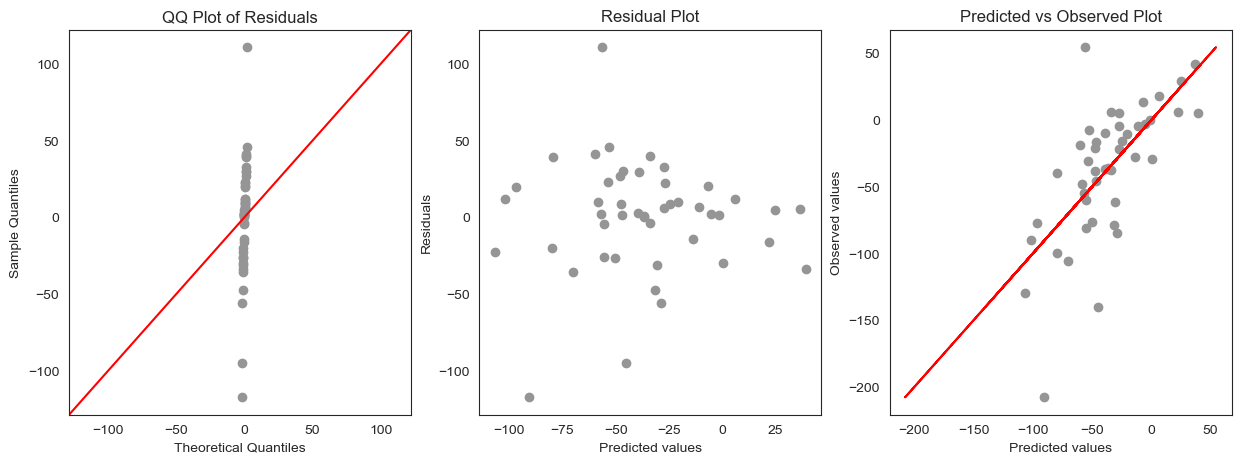

In [99]:
#Get residual diagnostics
from calvin_utils.statistical_measurements import model_diagnostics
fig = model_diagnostics(results)
fig.savefig(os.path.join(out_dir, f'multivariate_regression.png'))
fig.savefig(os.path.join(out_dir, f'multivariate_regression.svg'))

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


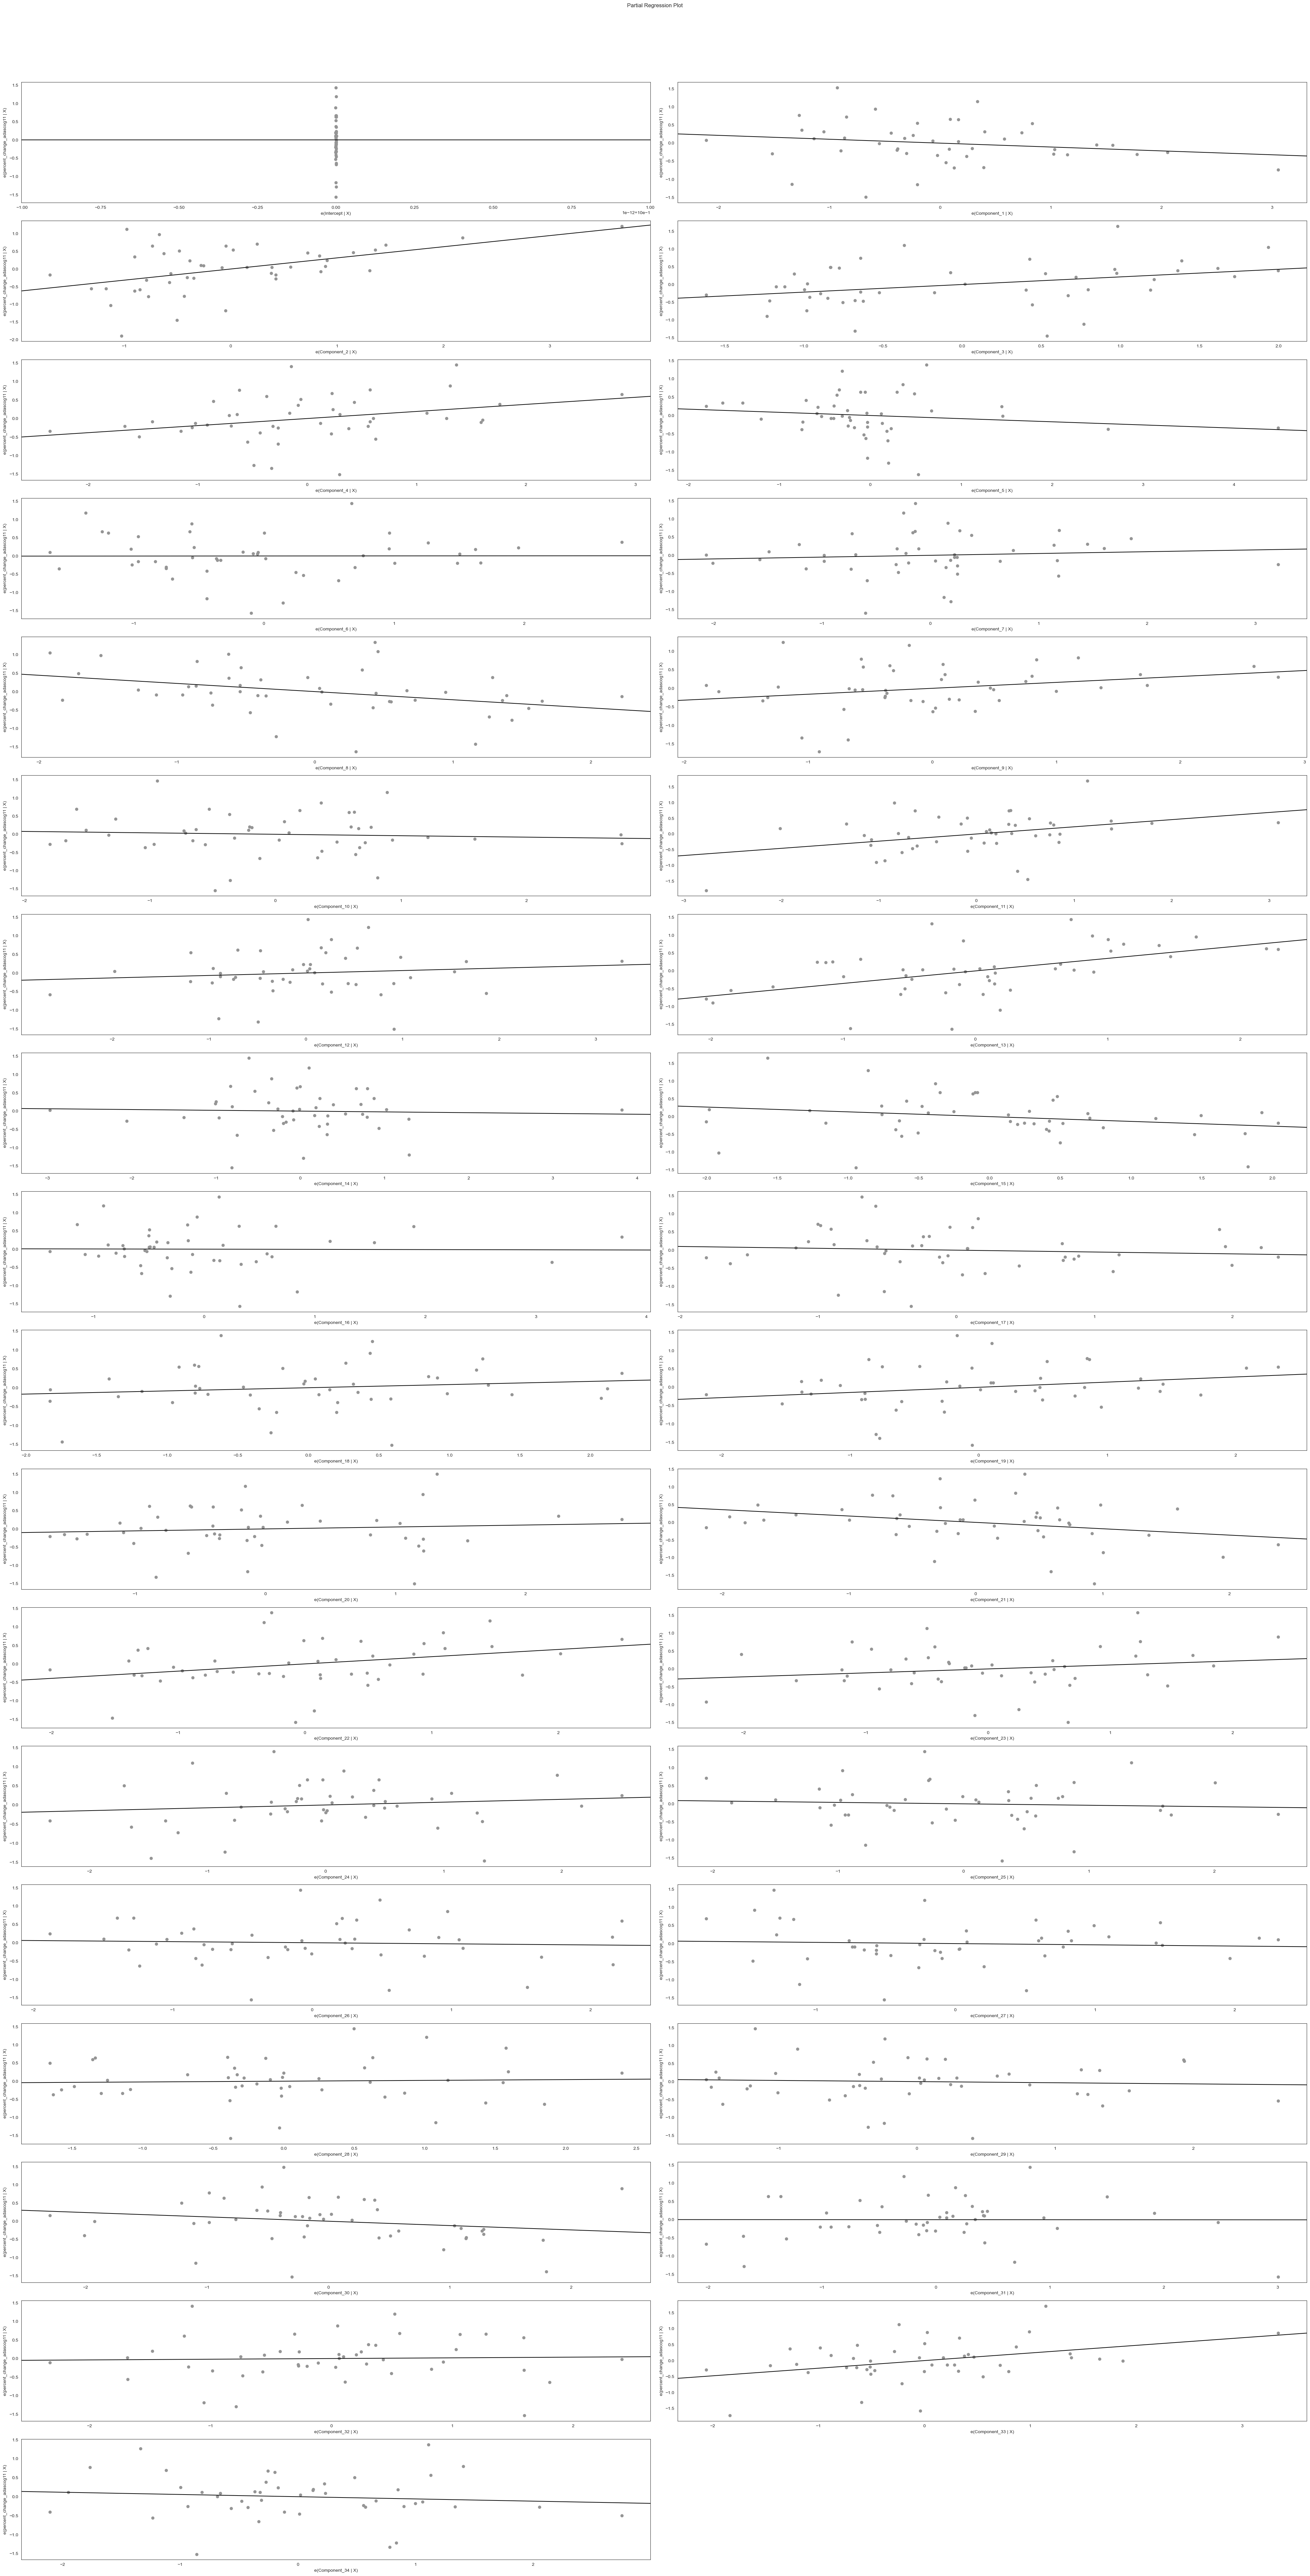

In [39]:
#Visualize
#Partial Regression Grid
from statsmodels.graphics.regressionplots import plot_partregress_grid
sns.set_style('white')
sns.set_palette('Greys', 1, desat=1)
fig = plt.figure(figsize=(40, 80))
plot_partregress_grid(results, fig=fig)

save=True
if save:
    if os.path.isdir(out_dir) == False:
        os.mkdir(out_dir)

    try:
        fig.savefig(os.path.join(out_dir, f'partial_regression_grid{formula}.png'))
        fig.savefig(os.path.join(out_dir, f'partial_regression_grid{formula}.svg'))
    except:
        fig.savefig(os.path.join(out_dir, f'partial_regression_grid_full_formula.png'))

In [44]:
#Single Coefficient Partial Regression Plot
from statsmodels.graphics.regressionplots import plot_partregress
##--Exog_others set to all co-regressors to generate plot when all held stable--##
# fig = plot_partregress(endog='percent_change_adascog11', exog_i='SBC',
#                         exog_others=all_indeps[0:6],
#                         data=data_df, obs_labels=False)

#---Change exog_others to set the independent variables to account for
# fig = plot_partregress(endog='percent_change_adascog11', exog_i='memory_roi',
#                         exog_others=['conjunction_rios_r_to_ferguson_t_95th_percentile_stdevthresh_0_voxthresh_10_absval_True_cluster_6'],
#                         data=data_df, obs_labels=False)

# plt.xlabel('Residual')
# plt.ylabel('Percent Change ADAS-Cog 11')
# plt.title('')

save=True
if save:
    if os.path.isdir(out_dir) == False:
        os.mkdir(out_dir)
    fig.savefig(os.path.join(out_dir, 'memory_roi.png'))

In [45]:
from statsmodels.graphics.regressionplots import plot_ccpr
sns.set_style('white')
# sns.set_palette('blue')

# ax = plot_ccpr(results, 'SBC')
# plt.xlabel('Independent Variable by Order')
# plt.ylabel('Error (Residual + BX)')
# plt.title('')

save=True
if save:
    if os.path.isdir(out_dir) == False:
        os.mkdir(out_dir)
    # ax.savefig(os.path.join(out_dir, f'ccpr_plot_{formula}.png'))


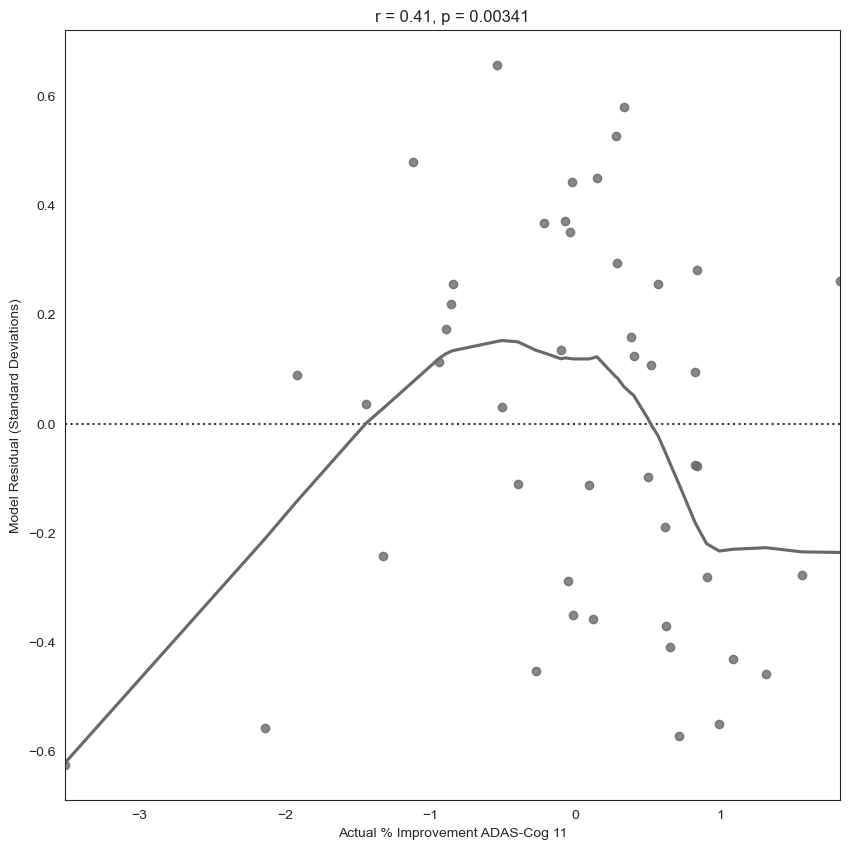

In [46]:
##-----------Generate Residual Plot---------------------------------------------
#Make Predictions
sns.set_style('white')
plt.figure(figsize=(10,10))
colors = ['#696969', '#BAB1B0', '#D3D3D3', '#D8D6D5']
customPalette = sns.set_palette(sns.color_palette(colors))
predictions = results.fittedvalues
r, p = pearson_df['R'][0], pearson_df['P'][0]

# plt.axes(aspect='equal')
sns.residplot(x=preserved_df.iloc[:,0], y=results.resid, lowess=True)
plt.title(f'r = {r:.2f}, p = {p:.5f}')
plt.xlabel('Actual % Improvement ADAS-Cog 11')
plt.ylabel('Model Residual (Standard Deviations)')

if save:
    try:
        plt.savefig(os.path.join(out_dir, f'residplot_{formula}.png'))
    except:
        plt.savefig(os.path.join(out_dir, f'summary_full_formula.png'))

## Generate a New Dataframe from Specified Columns

In [100]:
new_df = data_df.copy()
# columns_to_extract = ['percent_change_adascog11', 'Ventral_Attention', 'Frontoparietal']
new_df = new_df.iloc[:, 0:]
new_df.head(2)


,percent_change_adascog11,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,component_11,component_12,component_13,component_14,component_15,component_16,component_17,component_18,component_19
0,-21.428571,-36.237284,2.128193,5.969920,0.592432,1.905094,0.630565,-0.035935,1.175310,-0.914416,-0.143892,-0.457340,-0.142791,0.066655,-0.141257,0.07120,0.084019,0.098255,-0.037377,-0.115631
1,-36.363636,-34.535374,-4.110413,6.534924,8.055184,2.453324,1.910254,-2.104024,2.877859,-1.382618,0.657921,-0.609045,-0.289638,-0.099007,0.069244,0.35498,-0.026064,-0.073120,0.023409,0.009958


## Perform K Folds with statsmodels

In [101]:
from calvin_utils.cross_validation import k_folds

#Write the function to be passed to the LOO analysis
k=5
try:
    data_df.dropna(inplace=True)
    # data_df.reset_index(inplace=True, drop=True)
except:
    print('Cannot operate on DF')
function = 'generalizable_multivariate_regression(train_df, "percent_change_adascog11", train_df.columns.tolist()[1:])'

results_df = k_folds(data_df=new_df,train_function=function, k=k)
display(results_df)

# results_df.to_csv(os.path.join(out_dir, f'{k}_folds_analysis_{formula}.csv'))

,Avg MSE,avg_pearson_p,avg_pearson_r
0,6917.014657,0.49717,0.061525


## Perform leave-one-out analysis with statsmodels

In [102]:
from calvin_utils.cross_validation import leave_one_out
#Write the function to be passed to the LOO analysis
function = 'generalizable_multivariate_regression(iterating_df, "percent_change_adascog11", iterating_df.columns.tolist()[1:])'

#Pass the variables to the LOO analysis, with specific outcomes to extract as a list. 
loo_results = leave_one_out(data_df=new_df, outcome_var='percent_change_adascog11', function=function, leave_out_variable='index')
display(loo_results)


Could not calculate outcomes, suspect NaNs


,predictions,actuals,loocv_prediction_r,prediction_p
0,-32.236151,-21.428571,0.093088,0.538345
1,-49.435222,-36.363636,0.093088,0.538345
2,-0.472584,-78.947368,0.093088,0.538345
3,-76.068935,-129.411765,0.093088,0.538345
4,-41.396068,-10.526316,0.093088,0.538345
5,-49.912019,-38.461538,0.093088,0.538345
6,-31.788264,-15.384615,0.093088,0.538345
7,103.183811,-29.166667,0.093088,0.538345
8,-57.510979,-30.434783,0.093088,0.538345
9,43.654964,-84.615385,0.093088,0.538345


In [103]:
# loo_df = pd.DataFrame(loo_results)
from scipy.stats import spearmanr, pearsonr

#Calculate pearson predicted vs actual metrics
loo_results.dropna(inplace=True)
loo_results['loocv_pearson_r'], loo_results['loocv_pearson_p'] = spearmanr(loo_results['predictions'], loo_results['actuals'], alternative='greater')
loo_results['loocv_r_squared'] = np.square(loo_results['loocv_pearson_r'])
_, loo_results['loocv_pearson_p_greater'] = spearmanr(loo_results['predictions'], loo_results['actuals'], alternative='greater')
_, loo_results['loocv_pearson_p_lesser'] = spearmanr(loo_results['predictions'], loo_results['actuals'], alternative='less')
_, loo_results['loocv_pearson_p_two-sided'] = spearmanr(loo_results['predictions'], loo_results['actuals'], alternative='two-sided')


#Calculate MSE predicted vs actual metrics
loo_results['loocv_mse'] = (np.sum(np.square((loo_results['actuals']-loo_results['predictions'])))) / len(loo_results['actuals'])
loo_results['loocv_rmse'] = np.sqrt(loo_results['loocv_mse'])

#Calculate Mean Absolute Error
loo_results['mean_absolute_error'] = np.sum(np.absolute(loo_results['predictions']-loo_results['actuals']))/len(loo_results['predictions'])

# x = data_df['percent_change_adascog11'].values.tolist()
# display(loo_results['predictions'][1][0])
display(loo_results)

,predictions,actuals,loocv_prediction_r,prediction_p,loocv_pearson_r,loocv_pearson_p,loocv_r_squared,loocv_pearson_p_greater,loocv_pearson_p_lesser,loocv_pearson_p_two-sided,loocv_mse,loocv_rmse,mean_absolute_error
0,-32.236151,-21.428571,0.093088,0.538345,0.206056,0.08474,0.042459,0.08474,0.91526,0.16948,7539.292456,86.829099,57.506408
1,-49.435222,-36.363636,0.093088,0.538345,0.206056,0.08474,0.042459,0.08474,0.91526,0.16948,7539.292456,86.829099,57.506408
2,-0.472584,-78.947368,0.093088,0.538345,0.206056,0.08474,0.042459,0.08474,0.91526,0.16948,7539.292456,86.829099,57.506408
3,-76.068935,-129.411765,0.093088,0.538345,0.206056,0.08474,0.042459,0.08474,0.91526,0.16948,7539.292456,86.829099,57.506408
4,-41.396068,-10.526316,0.093088,0.538345,0.206056,0.08474,0.042459,0.08474,0.91526,0.16948,7539.292456,86.829099,57.506408
5,-49.912019,-38.461538,0.093088,0.538345,0.206056,0.08474,0.042459,0.08474,0.91526,0.16948,7539.292456,86.829099,57.506408
6,-31.788264,-15.384615,0.093088,0.538345,0.206056,0.08474,0.042459,0.08474,0.91526,0.16948,7539.292456,86.829099,57.506408
7,103.183811,-29.166667,0.093088,0.538345,0.206056,0.08474,0.042459,0.08474,0.91526,0.16948,7539.292456,86.829099,57.506408
8,-57.510979,-30.434783,0.093088,0.538345,0.206056,0.08474,0.042459,0.08474,0.91526,0.16948,7539.292456,86.829099,57.506408
9,43.654964,-84.615385,0.093088,0.538345,0.206056,0.08474,0.042459,0.08474,0.91526,0.16948,7539.292456,86.829099,57.506408


In [91]:
save=True
if save:
    if os.path.isdir(out_dir) != True:
        os.makedirs(out_dir)
        print('Made directory')
    try:
        loo_results.to_csv(os.path.join(out_dir, f'ols_leave_one_out_{formula}.csv'))
    except:
        loo_results.to_csv(os.path.join(out_dir, f'ols_leave_one_out_full_formula.csv'))


print('Saved to: ' + out_dir)

Saved to: /Users/cu135/Dropbox (Partners HealthCare)/memory/final_analyses/maxima_and_minima_rois/roi_roi_correlation/maxima_to_vta/principal_component_analysis/5mm_maxima_v2/pca_with_clinical_data/ols_linear_regression/regression


## Perform Permutation Analysis of the Regression

In [4]:
from calvin_utils.import_matrices import import_matrices_from_folder

#This code is expecting a dataframe with patients in rows, outcomes in a column, and voxels in all other columns. 
#The voxel column titles at this point must be strings

# Load the flattened dataframe
# df = import_matrices_from_folder(clin_path, file_pattern='/*.nii')
df = pd.read_csv('/Users/cu135/Dropbox (Partners HealthCare)/memory/functional_networks/response_topology/voxelwise_glm/age_interaction_rios_vtas/t_values_topology/matrix_to_test.csv')
df

,"Patient # CDR, ADAS",stdev_improvement_adascog11,age,93491,93492,93493,93582,93583,93672,93673,...,798109,798110,798190,798191,798192,798193,798281,798282,798283,798373
0,101,0.314000,62.0,-0.25830,-0.5034,-0.5957,-0.39380,-0.5537,-0.237800,-0.4610,...,0.33620,-0.20780,0.22240,0.19120,-0.008150,-0.273200,0.22380,0.16930,0.007553,0.09420
1,102,0.014000,77.0,-0.25760,-0.4915,-0.5580,-0.39500,-0.5347,-0.270300,-0.4840,...,0.47580,-0.02924,0.20240,0.16750,-0.000731,-0.217900,0.18930,0.14380,0.000192,0.07935
2,103,-0.842000,76.0,-0.11380,-0.3809,-0.4958,-0.22680,-0.4307,-0.024780,-0.2964,...,0.30080,-0.27030,0.55760,0.50440,0.285400,0.004300,0.57600,0.50900,0.346200,0.47750
3,104,-1.855000,65.0,-0.39870,-0.6930,-0.8320,-0.54250,-0.7373,-0.398400,-0.6157,...,-0.13960,-0.56350,0.02411,-0.01985,-0.237200,-0.531000,0.04953,-0.02629,-0.179300,-0.04755
4,105,0.533000,50.0,-0.89360,-1.2210,-1.4770,-1.21900,-1.3980,-1.264000,-1.4700,...,-1.04700,-1.67800,-0.84330,-0.79350,-0.832000,-1.080000,-0.83350,-0.77800,-0.776000,-0.72000
5,106,-0.028150,66.0,-0.18000,-0.4377,-0.5522,-0.27400,-0.4783,-0.030530,-0.3179,...,0.07184,-0.44210,0.57030,0.47920,0.222800,-0.080900,0.58400,0.47020,0.278300,0.45070
6,107,0.435500,64.0,-0.72200,-0.9600,-1.1450,-1.02800,-1.1250,-1.157000,-1.2660,...,-0.86870,-1.44000,-0.94700,-0.86100,-0.821000,-0.961000,-0.89160,-0.77000,-0.665000,-0.62400
7,108,0.158600,60.0,-0.52640,-0.8096,-1.0420,-0.80400,-0.9507,-0.953000,-1.0440,...,-0.90970,-1.45800,-0.86570,-0.79540,-0.755000,-0.905000,-0.79700,-0.67700,-0.558000,-0.48900
8,109,0.133200,72.0,-0.14810,-0.4214,-0.5703,-0.21570,-0.4314,0.022660,-0.2576,...,-0.05690,-0.56540,0.77200,0.63600,0.349000,0.028060,0.78100,0.62500,0.396200,0.59470
9,110,-0.955600,72.0,-0.36600,-0.5986,-0.7460,-0.39920,-0.6094,-0.105800,-0.3923,...,-0.58200,-1.03000,0.87940,0.60700,0.185400,-0.207500,0.87160,0.57130,0.234400,0.56450


In [5]:
# Achieve Voxels to Regress Upon 
import numpy as np
import pandas as pd
# Load the csv with voxel coordinates in it
coordinate_df = pd.read_csv(r'/Users/cu135/Dropbox (Partners HealthCare)/memory/final_analyses/maxima_and_minima_rois/ferguson_maxima_coordinates.csv')

#Convert coordinates to flattened coordinates
import nibabel as nib
from nimlab import datasets as nimds
from calvin_utils.matrix_utilities import convert_coordinate_to_index, convert_voxel_index_to_flattened_index

#Achieve relevant brain mask
mni_mask = nimds.get_img("mni_icbm152")
mask_affine = mni_mask.affine
mask_shape = mni_mask.shape

# Convert MNI coordinates to voxel space coordinates (i, j, k)
coordinate_df['voxel_coords'] = coordinate_df.apply(lambda row: convert_coordinate_to_index((row['x'], row['y'], row['z']), mask_affine), axis=1)

# Convert voxel space coordinates (i, j, k) to index coordinates
coordinate_df['index_coords'] = coordinate_df['voxel_coords'].apply(lambda coords: convert_voxel_index_to_flattened_index(coords, mask_shape))

# Display the resulting DataFrame
coordinate_df

,x,y,z,voxel_coords,index_coords
0,-6,-41,3,"(48, 42, 38)",479972
1,8,-39,3,"(41, 44, 38)",410721
2,-16,-31,-9,"(53, 48, 32)",530107
3,16,-31,-9,"(37, 48, 32)",371403
4,-2,-7,5,"(46, 60, 38)",461772
5,2,-7,5,"(44, 60, 38)",441934
6,0,51,-3,"(45, 88, 34)",454397
7,-40,-75,39,"(65, 26, 56)",647157
8,48,-67,35,"(21, 30, 54)",211083
9,-20,33,47,"(55, 80, 60)",552885


In [6]:

def find_closest_values(list_one, list_two):
    list_one_int = [int(x) for x in list_one]
    list_two_int = [int(x) for x in list_two]

    intersection_list = list(set(list_one_int) & set(list_two_int))
    complement_list = list(set(list_one_int) - set(intersection_list))

    closest_values = []
    for value in complement_list:
        min_distance = None
        closest_value = None
        for item in list_two_int:
            distance = abs(value - item)
            if min_distance is None or distance < min_distance:
                min_distance = distance
                closest_value = item
        closest_values.append(closest_value)

    return closest_values

In [7]:
# Now, double check that the coordiantes you are going to test are in the flattened niftis
nifti_coordinates = df.columns.values.tolist()
test_coordinates = coordinate_df.loc[:,'index_coords'].values.tolist()
test_coordinates = [str(test_coordinate) for test_coordinate in test_coordinates]
shared_elements = list(set(nifti_coordinates).intersection(test_coordinates))
print('Number of shared coordinates: ', np.count_nonzero(shared_elements))
print('Numbder of total coordiantes: ', len(coordinate_df['index_coords'].values))
print('---')
print(shared_elements)
print('Now attempting to find the missing value')
missing_vals = find_closest_values(test_coordinates, nifti_coordinates[3:])[0]
print('Missing value(s): ', missing_vals)
test_coordinates.append(str(missing_vals))
test_coordinates
shared_elements = list(set(nifti_coordinates).intersection(test_coordinates))
print('Number of shared coordinates: ', np.count_nonzero(shared_elements))
print('Numbder of total coordiantes: ', len(coordinate_df['index_coords'].values))

Number of shared coordinates:  18
Numbder of total coordiantes:  19
---
['457946', '461772', '552885', '154455', '390677', '412553', '530107', '408355', '647157', '371403', '759334', '334665', '454397', '441934', '211083', '482166', '499604', '479972']
Now attempting to find the missing value
Missing value(s):  410722
Number of shared coordinates:  19
Numbder of total coordiantes:  19


In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

X = df.loc[:, shared_elements]
X = sm.add_constant(X)
y = df.loc[:, 'stdev_improvement_adascog11']
model = sm.OLS(y, X).fit()
observed_r_squared = model.rsquared
print(model.summary2())

                      Results: Ordinary least squares
Model:              OLS                         Adj. R-squared:     0.134   
Dependent Variable: stdev_improvement_adascog11 AIC:                137.6796
Date:               2023-04-13 15:08            BIC:                174.2524
No. Observations:   46                          Log-Likelihood:     -48.840 
Df Model:           19                          F-statistic:        1.367   
Df Residuals:       26                          Prob (F-statistic): 0.227   
R-squared:          0.500                       Scale:              0.86601 
--------------------------------------------------------------------------------
             Coef.      Std.Err.        t        P>|t|       [0.025       0.975]
--------------------------------------------------------------------------------
const        5.7599       6.0254      0.9559     0.3479      -6.6256     18.1453
441934       0.4904       2.3120      0.2121     0.8337      -4.2620      5.2428
21

In [19]:
# Perform PALM assessment of the Regression
from calvin_utils.palm import permute_row
from tqdm import tqdm
n_permutations = 10000
# permuted_indices = permute_row(df.columns.values[3:])
empiric_r_squareds = []
y = df.loc[:, 'stdev_improvement_adascog11']
for i in tqdm(range(0, n_permutations)):
    randomly_sampled_indices = np.random.choice(df.columns.values[3:], size=len(shared_elements), replace=False)
    X = df.loc[:, randomly_sampled_indices]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    empiric_r_squareds.append(model.rsquared)
print(empiric_r_squareds)
print('empiric p: ', np.count_nonzero(empiric_r_squareds>observed_r_squared)/n_permutations)

100%|██████████| 10000/10000 [00:29<00:00, 336.87it/s]

[0.4279251972321807, 0.30060526470323945, 0.46977771855984884, 0.4735544846346885, 0.4480271753395261, 0.4131519965981738, 0.37690627395181375, 0.37731733418368785, 0.41090625713073436, 0.41569259130066905, 0.4491760011903284, 0.4014410449719016, 0.46574717685651024, 0.4540278046818689, 0.3619823360101936, 0.47028699151374376, 0.5195820112166056, 0.452391780663557, 0.43276087673059116, 0.4205274539737972, 0.4304350769605647, 0.4407484539897316, 0.4672095301632989, 0.47832607973851193, 0.3392958663817853, 0.467239416700577, 0.5095210632931668, 0.4359717294068082, 0.4197172159602581, 0.472321941788575, 0.4263348791489776, 0.37881987329886213, 0.36271219003746324, 0.43326329806488506, 0.44052086569637516, 0.42997443989128503, 0.47105115399106534, 0.49075942335256584, 0.3926455643555229, 0.438793576971207, 0.4240110167492067, 0.3960299771368436, 0.4962472577966721, 0.47309421525940554, 0.3002787170928263, 0.40918869421380233, 0.39882826357477386, 0.49073139888706174, 0.5063298327297823, 0.

## Perform partial regression

/usr/local/Caskroom/mambaforge/base/envs/nimlab_py310/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/usr/local/Caskroom/mambaforge/base/envs/nimlab_py310/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/usr/local/Caskroom/mambaforge/base/envs/nimlab_py310/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/usr/local/Caskroom/mambaforge/base/envs/nimlab_py310/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args 

-0.10866259888385003 0.9322326674825564


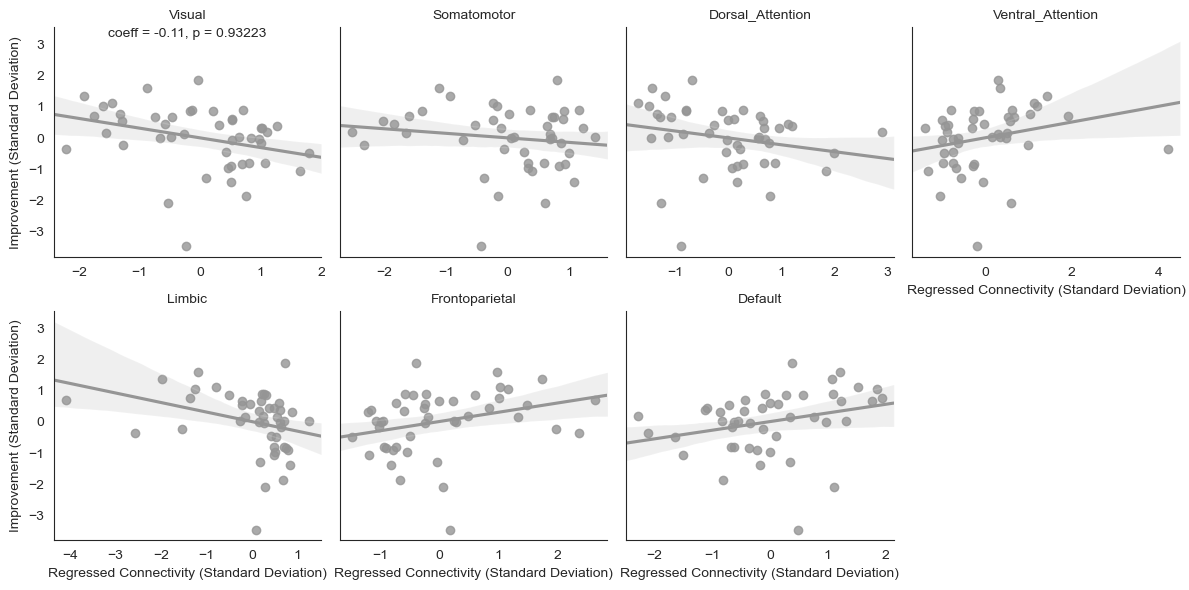

In [57]:
import statsmodels.formula.api as smf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
def partial_regression_plots(data_df, dep_var, all_indeps):
    sns.set_style('white')
    sns.set_palette('Greys', 1, desat=1)

    # Define the formula for the full model
    formula = f"{dep_var} ~ {' + '.join(all_indeps)}"

    # Fit the full model
    results = smf.ols(formula, data=data_df).fit()

    # Create the partial regression plots
    plot_data = pd.melt(data_df, id_vars=[dep_var], value_vars=all_indeps, var_name='indep_var')
    grid = sns.FacetGrid(plot_data, col='indep_var', col_wrap=4, sharex=False, sharey=True)
    grid.map(sns.regplot, 'value', dep_var, truncate=False)
    grid.set_axis_labels('Regressed Connectivity (Standard Deviation)', 'Improvement (Standard Deviation)')
    grid.set_titles(col_template="{col_name}")

    for ax, indep_var in zip(grid.axes.flat, all_indeps):
        # Calculate Spearman correlation and p-value

        # Get partial regression coefficients
        pr_formula = f"{dep_var} ~ {indep_var} + {' + '.join([var for var in all_indeps if var != indep_var])}"
        pr_results = smf.ols(pr_formula, data=data_df).fit()
        coef = pr_results.params[indep_var]
        pval = pr_results.pvalues[indep_var]
        print(coef, pval)

        #Get the Rho of the residuals to outcomes (currently unused)
        r, p = spearmanr(pr_results.resid, data_df[dep_var])


        # Annotate the plot with correlation and p-value
        ax.annotate(f"coeff = {coef:.2f}, p = {pval:.5f}", xy=(.5, 1.0), xycoords='axes fraction',
                    xytext=(0, 0), textcoords='offset points',
                    ha='center', va='top',
                    bbox=dict(boxstyle='round,pad=0.0', alpha=0.0),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
        return grid

grid = partial_regression_plots(data_df=data_df, dep_var=dep_var, all_indeps=all_indeps)

save=True
if save:
    if os.path.isdir(out_dir) == False:
        os.mkdir(out_dir)
    try:
        grid.savefig(os.path.join(out_dir, f'partial_regression_grid{formula}.png'))
        grid.savefig(os.path.join(out_dir, f'partial_regression_grid{formula}.svg'))
    except:
        grid.savefig(os.path.join(out_dir, f'partial_regression_grid_full_formula.png'))

## Some Simple Neural Network Stuff Below


Calculate the residuals for each regression, less one independent variable

In [33]:
import pandas as pd
import statsmodels.formula.api as smf

def create_residual_df(data_df, dep_var, all_indeps):
    # Initialize empty dictionary to store residuals
    residual_dict = {}

    # Loop through each independent variable
    for indep_var in all_indeps:
        # Define the formula for the partial model
        formula = f"{dep_var} ~ {' + '.join([var for var in all_indeps if var != indep_var])}"

        # Fit the partial model
        results = smf.ols(formula, data=data_df).fit()

        # Add the residuals to the dictionary with the independent variable name as the key
        residual_dict[indep_var] = results.resid

    # Add the dependent variable to the dictionary
    residual_dict[dep_var] = data_df[dep_var]

    # Convert the dictionary to a dataframe
    residual_df = pd.DataFrame(residual_dict)

    return residual_df
residual_df = create_residual_df(data_df, dep_var, all_indeps)
display(residual_df)

,Visual,Somatomotor,Dorsal_Attention,Ventral_Attention,Limbic,Frontoparietal,Default,percent_change_adascog11
0,0.504906,0.661965,0.733902,0.710747,0.630249,0.639254,0.774454,0.317537
1,0.345768,0.483223,0.475347,0.572580,0.392728,0.452832,0.535345,0.014153
2,-0.608214,-0.541917,-0.589755,-0.511245,-0.562377,-0.553104,-0.547120,-0.850871
3,-1.387638,-1.372139,-1.403891,-1.453509,-1.340880,-1.353002,-1.603680,-1.875980
4,0.548711,0.472267,0.753192,0.383926,0.436452,0.503375,0.375960,0.539000
5,0.286951,0.323120,0.327597,0.304653,0.350959,0.331695,0.263017,-0.028462
6,0.609797,0.585990,0.844205,0.529389,0.504625,0.591284,0.569032,0.440311
7,-0.015297,-0.001933,0.200481,-0.115186,-0.028702,0.022613,-0.109236,0.160349
8,0.181480,0.106997,0.111865,0.127160,0.078989,0.120716,0.129714,0.134589
9,-0.674403,-0.762492,-0.735997,-0.817409,-0.718778,-0.726485,-0.876329,-0.966009


Perform linear regressions using the residual against the dependent variable

/usr/local/Caskroom/mambaforge/base/envs/nimlab_py310/lib/python3.10/site-packages/seaborn/regression.py:582: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/usr/local/Caskroom/mambaforge/base/envs/nimlab_py310/lib/python3.10/site-packages/seaborn/regression.py:582: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


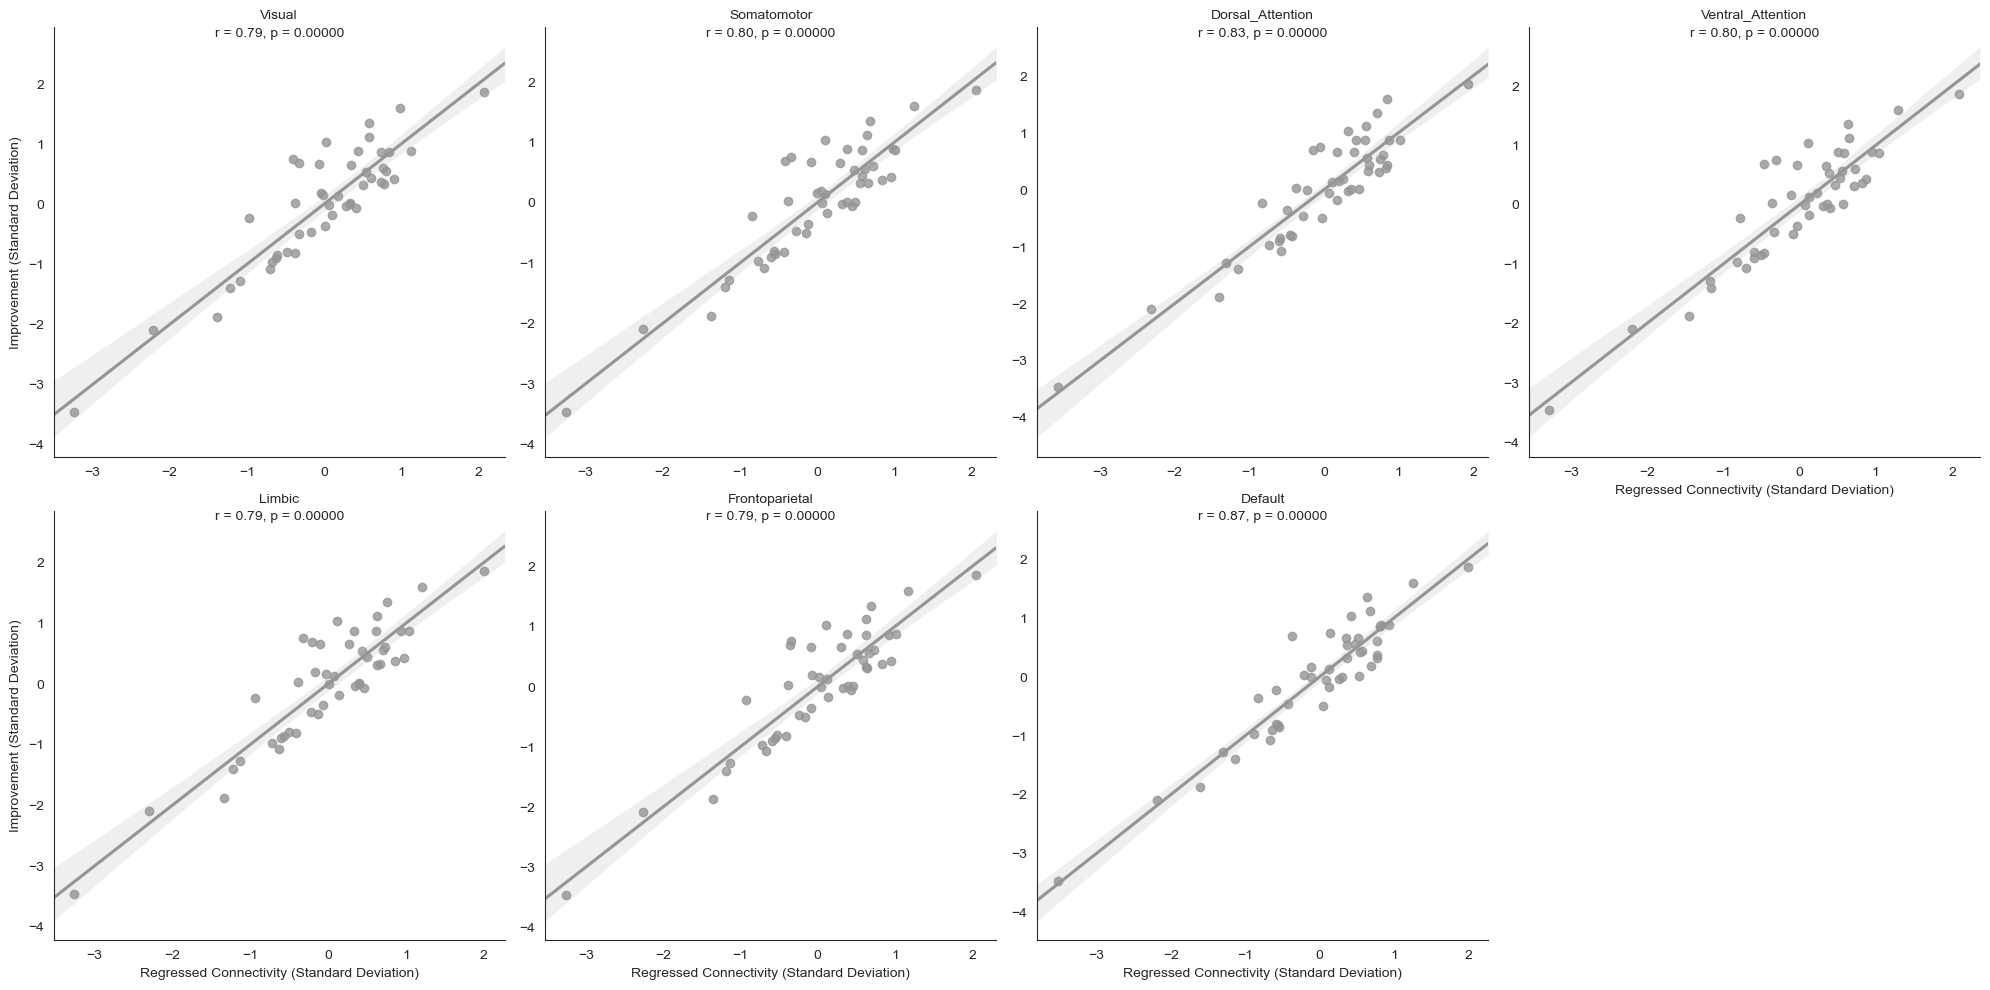

In [50]:
import seaborn as sns
from scipy.stats import spearmanr

def plot_residuals(residual_df, dep_var, indep_vars):
    sns.set_style('white')
    sns.set_palette('Greys', 1, desat=1)

    # Melt the residual dataframe
    melted_df = pd.melt(residual_df, id_vars=[dep_var], value_vars=indep_vars, var_name='indep_var')

    # Create the facet grid of lmplots
    facet_plot = sns.lmplot(y=dep_var, x='value', data=melted_df,
                            col='indep_var', col_wrap=4,
                            truncate=False, sharex=False, sharey=True)
    facet_plot.set_titles(col_template="{col_name}")
    facet_plot.set_axis_labels('Regressed Connectivity (Standard Deviation)', 'Improvement (Standard Deviation)')
    
    # Calculate Spearman correlation and p-value for each independent variable
    correlations = {}
    for iv in indep_vars:
        r, p = spearmanr(residual_df[iv], residual_df[dep_var])
        correlations[iv] = (r, p)

    # Add annotations to the facet grid
    for i, ax in enumerate(facet_plot.axes.flat):
        iv = indep_vars[i]
        r, p = correlations[iv]
        ax.annotate(f"r = {r:.2f}, p = {p:.5f}", xy=(.5, 1.0), xycoords='axes fraction',
                    xytext=(0, 0), textcoords='offset points',
                    ha='center', va='top',
                    bbox=dict(boxstyle='round,pad=0.0', alpha=0.0),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

    return facet_plot

plot_residuals(residual_df, dep_var, all_indeps)

## Get the results of the partial regression from a multivariate regression

In [49]:
import statsmodels.api as sm

def multiple_regression(residual_df, dep_var):
    X = residual_df.drop([dep_var], axis=1)
    y = residual_df[dep_var]

    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    
    return model

model = multiple_regression(residual_df, dep_var)
print(model.summary2())

                     Results: Ordinary least squares
Model:              OLS                      Adj. R-squared:     0.887   
Dependent Variable: percent_change_adascog11 AIC:                38.6211 
Date:               2023-02-17 14:41         BIC:                53.2503 
No. Observations:   46                       Log-Likelihood:     -11.311 
Df Model:           7                        F-statistic:        51.27   
Df Residuals:       38                       Prob (F-statistic): 2.03e-17
R-squared:          0.904                    Scale:              0.11590 
--------------------------------------------------------------------------
                       Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
--------------------------------------------------------------------------
const                  0.0000    0.0502   0.0000  1.0000   -0.1016  0.1016
Visual                 0.8807    0.9399   0.9370  0.3547   -1.0221  2.7835
Somatomotor            0.2257    3.7893   0.0596  0.95

In [70]:
import re

def create_residual_df(data_df, dep_var, all_indeps):
    # Initialize empty dictionary to store residuals
    residual_dict = {}

    # Loop through each independent variable
    for indep_var in all_indeps:
        # Define the formula for the partial model
        partial_formula = f"{dep_var} ~ {' + '.join([var for var in all_indeps if var != indep_var])}"

        # Fit the partial model
        partial_results = smf.ols(partial_formula, data=data_df).fit()

        # Add the residuals to the dictionary with the independent variable name as the key
        partial_col_name = re.sub(r'\W+', '', indep_var) + '_partial_dep'
        residual_dict[partial_col_name] = partial_results.resid

        # Define the formula for the second model
        second_formula = f"{indep_var} ~ {' + '.join([var for var in all_indeps if var != indep_var])}"

        # Fit the second model
        second_results = smf.ols(second_formula, data=data_df).fit()

        # Add the residuals to the dictionary with the independent variable name as the key
        second_col_name = re.sub(r'\W+', '', indep_var) + '_partial_indep'
        residual_dict[second_col_name] = second_results.resid

    # Add the dependent variable to the dictionary
    dep_col_name = re.sub(r'\W+', '', dep_var)
    residual_dict[dep_col_name] = data_df[dep_var]

    # Convert the dictionary to a dataframe
    residual_df = pd.DataFrame(residual_dict)
    residual_df = residual_df.drop(columns=[dep_col_name]) # remove dependent variable column
    return residual_df

res_df = create_residual_df(residual_df, dep_var, all_indeps)


In [71]:
display(res_df)

,Visual_partial_dep,Visual_partial_indep,Somatomotor_partial_dep,Somatomotor_partial_indep,Dorsal_Attention_partial_dep,Dorsal_Attention_partial_indep,Ventral_Attention_partial_dep,Ventral_Attention_partial_indep,Limbic_partial_dep,Limbic_partial_indep,Frontoparietal_partial_dep,Frontoparietal_partial_indep,Default_partial_dep,Default_partial_indep
0,-0.386665,-0.098022,-0.302941,-0.011550,-0.311866,0.032339,-0.336985,0.040737,-0.324854,-0.007917,-0.328356,0.007884,-0.357599,-0.035617
1,-0.269273,-0.098779,-0.186166,-0.017239,-0.189284,0.019655,-0.239060,0.063114,-0.314829,-0.042798,-0.228783,0.013084,-0.265766,-0.051929
2,-0.254466,-0.053087,-0.209825,-0.009371,-0.202703,-0.014041,-0.229158,0.023839,-0.245216,-0.012110,-0.232094,0.006860,-0.208859,-0.000715
3,-0.256292,-0.029434,-0.228702,0.007386,-0.241274,0.030580,-0.204902,-0.028306,-0.249566,-0.006198,-0.228029,-0.000658,-0.298239,-0.042214
4,0.425625,0.033484,0.400957,0.021365,0.344322,0.145298,0.431082,-0.038843,0.271106,-0.040368,0.423944,-0.007824,0.179773,-0.134572
5,-0.327220,-0.037647,-0.294944,-0.003901,-0.297028,0.008314,-0.299602,0.006157,-0.276424,0.005695,-0.303814,0.002743,-0.314255,-0.012559
6,0.199117,0.030540,0.177571,0.023712,0.120051,0.146295,0.205717,-0.037232,0.022428,-0.048363,0.202498,-0.008519,-0.044697,-0.134917
7,0.453834,-0.037671,0.490154,0.013916,0.463764,0.065197,0.543889,-0.063216,0.314391,-0.055735,0.478084,0.002512,0.411241,-0.047128
8,0.080511,-0.000312,0.078072,-0.012024,0.104376,-0.066156,0.076117,0.005189,-0.043178,-0.040024,0.043174,0.010582,0.180260,0.061871
9,-0.138884,0.006893,-0.145360,-0.001796,-0.136988,-0.022341,-0.127427,-0.019481,-0.170373,-0.008207,-0.155670,0.003015,-0.105759,0.024379


In [92]:
import seaborn as sns

# Get the unique first words in the column names
first_words = set([col.split()[0].split('_')[0] for col in res_df.columns])
print(first_words)

col_pairs = []
for word in first_words:
    cols = [col for col in res_df.columns if word in col]
    if len(cols) == 2:
        col_pairs.append(cols)
print(col_pairs)
# Create facet grid of lmplots for columns with the same first word
g = sns.FacetGrid(res_df, col=col_pairs, col_wrap=3)
g.map(sns.lmplot, x=col_pairs[i][0], y=col_pairs[i][1], data=res_df, scatter_kws={'s': 10}) 


{'Visual', 'Dorsal', 'Limbic', 'Default', 'Frontoparietal', 'Ventral', 'Somatomotor'}
[['Visual_partial_dep', 'Visual_partial_indep'], ['Dorsal_Attention_partial_dep', 'Dorsal_Attention_partial_indep'], ['Limbic_partial_dep', 'Limbic_partial_indep'], ['Default_partial_dep', 'Default_partial_indep'], ['Frontoparietal_partial_dep', 'Frontoparietal_partial_indep'], ['Ventral_Attention_partial_dep', 'Ventral_Attention_partial_indep'], ['Somatomotor_partial_dep', 'Somatomotor_partial_indep']]


KeyError: "None of [Index([                      ('Visual_partial_dep', 'Visual_partial_indep'),\n         ('Dorsal_Attention_partial_dep', 'Dorsal_Attention_partial_indep'),\n                             ('Limbic_partial_dep', 'Limbic_partial_indep'),\n                           ('Default_partial_dep', 'Default_partial_indep'),\n             ('Frontoparietal_partial_dep', 'Frontoparietal_partial_indep'),\n       ('Ventral_Attention_partial_dep', 'Ventral_Attention_partial_indep'),\n                   ('Somatomotor_partial_dep', 'Somatomotor_partial_indep')],\n      dtype='object')] are in the [columns]"

In [96]:
sns.lmplot(x="Visual_partial_indep", y="Visual_partial_dep", data=res_df)


[['Visual_partial_dep', 'Visual_partial_indep'], ['Dorsal_Attention_partial_dep', 'Dorsal_Attention_partial_indep'], ['Limbic_partial_dep', 'Limbic_partial_indep'], ['Default_partial_dep', 'Default_partial_indep'], ['Frontoparietal_partial_dep', 'Frontoparietal_partial_indep'], ['Ventral_Attention_partial_dep', 'Ventral_Attention_partial_indep'], ['Somatomotor_partial_dep', 'Somatomotor_partial_indep']]


ValueError: Number of rows must be a positive integer, not 0

<Figure size 900x0 with 0 Axes>

In [98]:
import seaborn as sns

# Get the unique first words in the column names
first_words = set([col.split()[0].split('_')[0] for col in res_df.columns])
print(first_words)

col_pairs = []
for word in first_words:
    cols = [col for col in res_df.columns if word in col]
    if len(cols) == 2:
        col_pairs.append(cols)

# Create facet grid of lmplots for columns with the same first word
g = sns.FacetGrid(res_df, col=first_words, col_wrap=3)

# Map lmplot onto each pair of columns
for pair in col_pairs:
    x, y = pair
    g.map(sns.lmplot, x=x, y=y, data=res_df, scatter_kws={'s': 10})
    
# Show the plot
plt.show()


{'Visual', 'Dorsal', 'Limbic', 'Default', 'Frontoparietal', 'Ventral', 'Somatomotor'}


/usr/local/Caskroom/mambaforge/base/envs/nimlab_py310/lib/python3.10/site-packages/seaborn/axisgrid.py:396: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  col_names = categorical_order(data[col], col_order)


KeyError: "None of [Index(['Visual', 'Dorsal', 'Limbic', 'Default', 'Frontoparietal', 'Ventral',\n       'Somatomotor'],\n      dtype='object')] are in the [columns]"